<a href="https://colab.research.google.com/github/chevamikado/ImageClassificationCNN/blob/master/DogDetectionCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import zipfile
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras # Tensorflow high-level api
from tensorflow.keras import layers
from keras.models import load_model
from keras import optimizers
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.models import Model, Sequential
from keras.layers import Dense,Flatten, GlobalAveragePooling2D, BatchNormalization, Activation, Dropout, Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, CSVLogger, ReduceLROnPlateau
#from keras.layers import Activation, Dropout, Flatten, Dense
from keras.applications.xception import Xception
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammedzahdbozku","key":"4afdd6a3eca0d68941b8aea1be0d1529"}'}

In [ ]:
#before importing the dataset we want to use this code
# The Kaggle API client expects this file to be in ~/.kaggle,
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d jessicali9530/stanford-dogs-dataset

 97% 730M/750M [00:14<00:00, 48.4MB/s]
100% 750M/750M [00:14<00:00, 53.6MB/s]


In [ ]:
local_zip = '/content/stanford-dogs-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/stanford-dogs')
zip_ref.close()

In [ ]:
train_data = []
train_labels = []
test_data = []
test_labels = []
im_width = 128
im_height = 128
num_classes = 120

In [ ]:
def preProcessTrainData(path):
    i = 0
    progress = 0
    folders = [f for f in os.listdir(path)]
    for folder in folders:
        image_files = [f for f in os.listdir(path+folder)]
        for file_name in image_files:
            image_file = str(path + folder+'/' +file_name)
        
            img = cv2.imread(image_file,cv2.IMREAD_GRAYSCALE)
            new_img = cv2.resize(img,(im_width,im_height))
            train_data.append(new_img)
            progress = progress+1
        
            train_labels.append(i)
        
            if progress%1000==0:
                print('Progress '+str(progress)+' Image done')
        i = i + 1

In [ ]:
print(os.listdir("./stanford-dogs"))

['annotations', 'images']


In [ ]:
preProcessTrainData("./stanford-dogs/images/Images/")

Progress 1000 Image done
Progress 2000 Image done
Progress 3000 Image done
Progress 4000 Image done
Progress 5000 Image done
Progress 6000 Image done
Progress 7000 Image done
Progress 8000 Image done
Progress 9000 Image done
Progress 10000 Image done
Progress 11000 Image done
Progress 12000 Image done
Progress 13000 Image done
Progress 14000 Image done
Progress 15000 Image done
Progress 16000 Image done
Progress 17000 Image done
Progress 18000 Image done
Progress 19000 Image done
Progress 20000 Image done


In [ ]:
train_data = np.array(train_data)
print(train_data.shape)

(20580, 128, 128)


In [ ]:
train_labels = np.array(train_labels)
train_labels.shape

(20580,)

In [ ]:
train_data = train_data.reshape((train_data.shape)[0],(train_data.shape)[1],(train_data.shape)[2],1)
train_data.astype('float32')
train_data = train_data/255.0
print(train_data.shape)

(20580, 128, 128, 1)


In [ ]:
train_labels.astype('uint8')
#test_labels.astype('uint8')
train_labels = keras.utils.to_categorical(train_labels, num_classes)
#test_labels = keras.utils.to_categorical(test_labels, num_classes)

In [ ]:
def shuffle(a, b):
    rng_state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(rng_state)
    np.random.shuffle(b)

In [ ]:
for i in range(10):
    shuffle(train_data,train_labels)

In [ ]:
model = Sequential()
model.add(Conv2D(16,(3,3), input_shape=(128,128,1), activation="relu"))
model.add(Conv2D(16,(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(32,(3,3),  activation="relu",padding="same"))
model.add(Conv2D(32,(3,3),  activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3),  activation="relu",padding="same"))
model.add(Conv2D(64,(3,3),  activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
  
model.add(Flatten())
model.add(Dense(500, activation="relu"))
##model.add(Dropout(0.5))
model.add(Dense(250, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(120, activation="softmax"))
model.compile(Adam(lr=0.001), loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
##model = load_model("myModelForTest2.h5")

In [ ]:
history = model.fit(train_data, train_labels,
          batch_size=64,
          epochs=100,
          verbose=1, shuffle = True,validation_split=0.20)

Train on 16464 samples, validate on 4116 samples
Epoch 1/100
16464/16464 [==============================] - 38s 2ms/step - loss: 4.8702 - accuracy: 0.0103 - val_loss: 4.7931 - val_accuracy: 0.0061
Epoch 2/100
16464/16464 [==============================] - 30s 2ms/step - loss: 4.7641 - accuracy: 0.0160 - val_loss: 4.8623 - val_accuracy: 0.0138
Epoch 3/100
16464/16464 [==============================] - 31s 2ms/step - loss: 4.7025 - accuracy: 0.0213 - val_loss: 4.8104 - val_accuracy: 0.0221
Epoch 4/100
16464/16464 [==============================] - 31s 2ms/step - loss: 4.6006 - accuracy: 0.0265 - val_loss: 4.5599 - val_accuracy: 0.0347
Epoch 5/100
16464/16464 [==============================] - 31s 2ms/step - loss: 4.4952 - accuracy: 0.0358 - val_loss: 4.6818 - val_accuracy: 0.0347
Epoch 6/100
16464/16464 [==============================] - 31s 2ms/step - loss: 4.3821 - accuracy: 0.0466 - val_loss: 4.5853 - val_accuracy: 0.0289
Epoch 7/100
16464/16464 [==============================] - 30s 

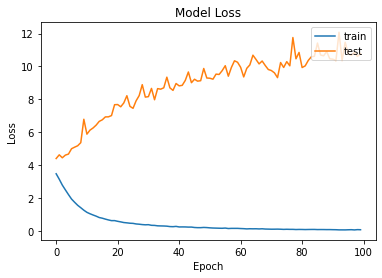

In [ ]:
uplt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
model.save("myModelForTest2.h5")

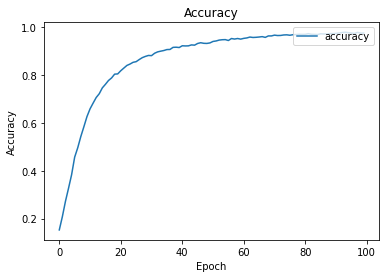

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy'], loc='upper right')
plt.show()